In [ ]:
*/#1. Maskeleme (Masking)
Maskeleme, bir görüntünün yalnızca belirli bir bölgesini işlemede kullanılır. Maskeleme, bir görüntü üzerinde bir maske 
(başka bir görüntü) kullanarak belirli pikselleri seçip diğerlerini yok sayma işlemidir.
* /
Mantığı: Bir maske oluşturulduğunda, genellikle bir ikili görüntü (binary image) kullanılır. Bu görüntüde beyaz (255) olan 
    pikseller hedeflenir ve siyah (0) olan pikseller yok sayılır. Bu sayede yalnızca belirlenen bölgedeki pikseller işleme alınır.
Kullanım Amacı: Maskeleme, görüntüde ilgilenilen bölgeyi seçip, bu bölge üzerinde işlemler yapmak istediğimizde kullanılır.
    Örneğin, bir yüz görüntüsünde sadece göz veya ağız bölgesini işlemek için kullanılabilir.
Örnek: Bir görüntü üzerinde sadece bir daire içerisindeki bölgeyi işlemek istiyoruz. Daireyi maskeliyoruz ve geri kalan pikselle
r yok sayılıyor.

python
Kodu kopyala
import cv2
import numpy as np

# Orijinal görüntü
img = cv2.imread('image.jpg')

# Maske oluşturma (aynı boyutta siyah bir görüntü)
mask = np.zeros(img.shape[:2], dtype="uint8")

# Maske üzerinde bir daire oluştur
cv2.circle(mask, (150, 150), 100, 255, -1)

# Maske ile orijinal görüntüyü birleştir
masked_img = cv2.bitwise_and(img, img, mask=mask)

cv2.imshow('Masked Image', masked_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


2. Thresholding (Eşikleme)
Thresholding, bir görüntüdeki pikselleri belirli bir değerin üzerinde veya altında olacak şekilde ikili hale getirme işlemidir. Yani, belirli bir eşik değeri kullanarak görüntüyü siyah-beyaz hale getiririz. Belirlenen eşik değeri üzerindeki pikseller beyaz (1), altındaki pikseller ise siyah (0) yapılır.

Mantığı: Görüntüdeki parlaklık değerlerine göre piksellerin ayrılması. Eşikleme, genellikle bir nesneyi arka plandan ayırmak için kullanılır. Eşik değeri, piksellerin ne zaman beyaz ya da siyah olacağına karar verir.

Kullanım Amacı: Özellikle objelerin kenarlarını belirlemek veya bir görüntüde belirli bir parlaklık seviyesini izole etmek istediğimizde kullanılır. Örneğin, bir el yazısını kağıt zemininden ayırmak veya yüz tespitinde belirli alanları izole etmek için.

Örnek: Bir görüntüdeki pikselleri 127 eşik değeriyle siyah ve beyaz olarak bölmek.

python
Kodu kopyala
# Grayscale (gri tonlamalı) görüntüyü oku
gray_img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Eşikleme işlemi
_, threshold_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)

cv2.imshow('Threshold Image', threshold_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
Farkları ve Kullanım Alanları:
Maskeleme: Belirli bir bölgeyi seçmek, işlem yapmak istediğiniz bölgeyi belirlemek için kullanılır.
Thresholding: Görüntüdeki parlaklık seviyelerini ayırarak nesneleri veya bölgeleri belirgin hale getirmek için kullanılır.
Her iki yöntem de görüntü işleme projelerinde yaygın olarak kullanılır, özellikle nesne tespiti, kenar bulma ve segmentasyon gibi işlemlerde.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

In [2]:
img=cv2.imread(r"C:\Users\meric\Desktop\Computer-Vision-with-Python\DATA\00-puppy.jpg")

In [3]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

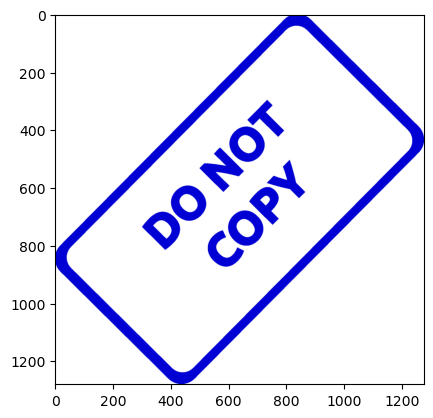

In [4]:
imgs1=cv2.imread(r"C:\Users\meric\Desktop\Computer-Vision-with-Python\DATA\watermark_no_copy.png")
plt.imshow(imgs1)

In [5]:
imgs1=cv2.cvtColor(imgs1,cv2.COLOR_BGR2RGB)

In [6]:
img.shape,imgs1.shape

((1300, 1950, 3), (1280, 1277, 3))

In [7]:
imgs1=cv2.resize(imgs1,(600,600))

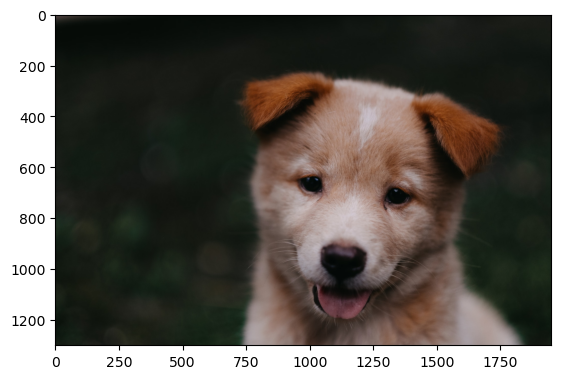

In [8]:
plt.imshow(img)

In [35]:
img.shape,imgs1.shape

((1300, 1950, 3), (600, 600, 3))

In [11]:
x_offset=0
y_offset=0
x_end=x_offset + imgs1.shape[1]
y_end=y_offset + imgs1.shape[0]

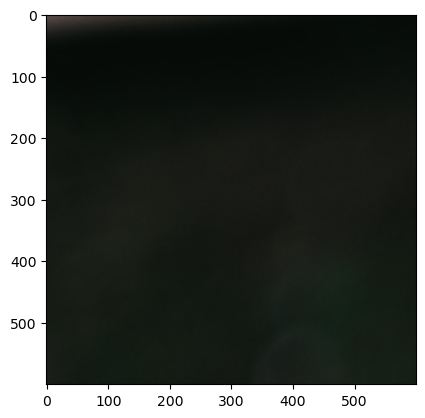

In [13]:
roi=img[x_offset:x_end,y_offset:y_end]
plt.imshow(roi)

In [51]:
x_offset=1950-600 #bu başlangıç sağ alt köşeden
y_offset=1300-600 #sol üst köşeden

In [ ]:
. x_offset ve y_offset
Bu satırlarda, ilgilenilen bölgenin başlangıç noktası belirlenir.
x_offset = 1950 - 600, 1950'den 600 çıkarılarak x koordinatında bir başlangıç noktası belirlenir, bu da sağ taraftan sola doğru bir bölge seçildiğini gösterir.
y_offset = 1300 - 600, 1300'den 600 çıkarılarak y koordinatında da başlangıç noktası belirlenir, yani aşağıdan yukarıya doğru bir bölge seçilir.
2. roi = img[y_offset:1300, x_offset:1950]
Burada, görüntünün y_offset ile 1300 ve x_offset ile 1950 arasında kalan kısmı seçiliyor.
Bu bölge, büyük bir görüntüden sadece belirli bir alanı almak için kullanılır. Bu alanda işlemler yapılabilir, bu bölüm başka bir yere yapıştırılabilir veya işlenebilir.
Örnek:
img boyutu: 2000x1500 piksel
Bu kod, img görüntüsünün sağ alt köşesindeki 600x600 piksellik bir bölümü seçer. Bu seçilen bölge roi (Region of Interest) olarak adlandırılır ve üzerinde çeşitli işlemler yapılabilir.

In [18]:
roms,cols,channels=imgs1.shape

In [29]:
roms

600

In [52]:
roi=img[y_offset:1300,x_offset:1950]

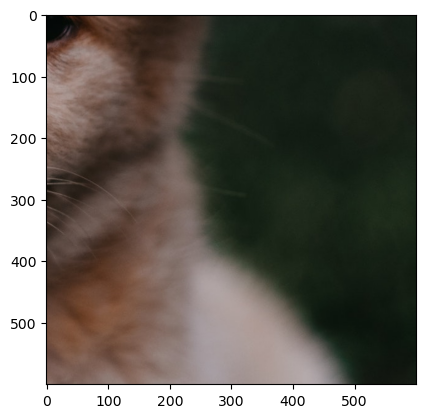

In [53]:
plt.imshow(roi)

In [54]:
img2gray=cv2.cvtColor(imgs1,cv2.COLOR_RGB2GRAY)

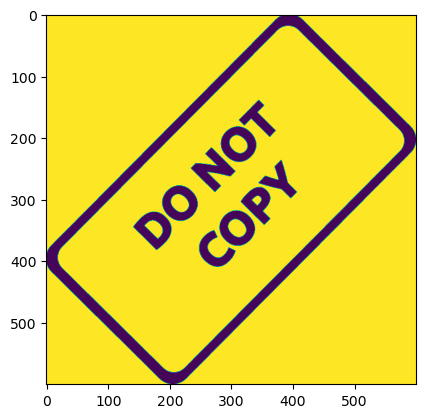

In [55]:
plt.imshow(img2gray)

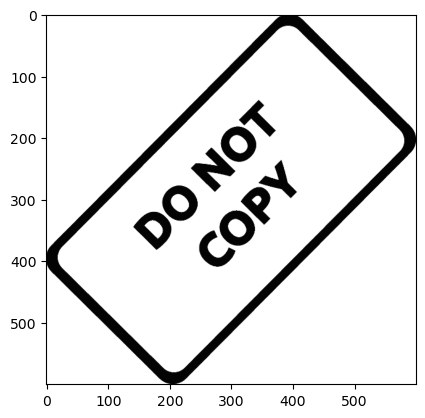

In [56]:
plt.imshow(img2gray,cmap="gray") #şu an maskeyi oluşturuyoz arka plan beyaz olcak

In [57]:
mask=cv2.bitwise_not(img2gray) #siyahsa beyaz beyazsa siyah yapar


In [ ]:
#ÖNEMLİ NOTLAR
Gri tonlama, bir görüntüyü renkli (RGB) bir formattan gri tonlamalı (siyah-beyaz) bir formata dönüştürür
Her bir pikselin kırmızı, yeşil ve mavi bileşenleri yerine tek bir yoğunluk değeri bulunur. 
Bu, genellikle piksellerin parlaklık bilgisine dayanır.

İlk gray işlemi: Renkli bir görüntüde her piksel RGB (Kırmızı, Yeşil, Mavi) bileşenlerinden oluşur. İlk gray (gri tonlama) 
    işlemi, bu üç renk bileşeninin bir ortalaması alınarak her pikselin bir parlaklık değeriyle temsil edilmesini sağlar

İkinci gray işlemi: Eğer bir görüntüye tekrar gray işlemi uygulanırsa, zaten tek kanallı (gri tonlu) bir görüntü olduğu için,
ikinci gri tonlama işlemi mantıksızdır. Yani zaten grileşmiş bir görüntüde renk bilgisi yoktur, 
bu nedenle ikinci bir gray işlemi onu beyaz-siyah değerlere yakınlaştırabilir.

Neden Bu Şekilde Değişiklik Oluyor?
Görüntüyü gray ile grileştirdiğinizde ilk seferde renkli bir görüntü gri tonlarına dönüştü. Fakat, ikinci gray işleminden 
sonra farklı bir etki gördünüz çünkü:

İlk Gray Sonrası (Mor ve Sarı): İlk cv2.cvtColor() işlemi, RGB renk uzayındaki renkleri gri tonlamaya dönüştürdü.
Bu sırada bazı bölgeler farklı tonlarda grileşti, örneğin mavi ve kırmızı tonlar farklı sonuçlar verdi.
İkinci Gray Sonrası (Beyaz ve Siyah): İkinci gray işlemi, artık renk bilgisi olmayan bir görüntü üzerinde tekrar gri tonlama
yaptı. Bu, tüm parlak bölgelerin (örneğin sarı tonları) beyaza ve daha karanlık bölgelerin 
(örneğin mor tonları) siyaha dönüşmesine neden oldu.

Neden Yapıyoruz?
Çift gri tonlama genellikle gerekli olmayan bir işlemdir ve renk bilgisi kaybına neden olur. BİLGİ KAYBI
Eğer gray işlemi iki kez uygulanırsa, bu işlem sadece görüntüyü daha keskin siyah-beyaz hale getirir. 
Asıl yapılması gereken, ilk gri tonlamadan sonra görüntü üzerinde başka analizler yapmak veya maskeleme, kenar bulma gibi teknikler uygulamaktır.

Örnek: İlk Gray ve İkinci Gray İşlemi
İlk gri tonlama işlemi:
RGB'den gri tonlamaya geçiş: Örneğin, mavi ve sarı tonlar mor ve sarı gibi gri tonlar oluşturur.
İkinci gri tonlama işlemi:
Artık sadece parlaklık bilgisine göre çalışan bir görüntüde, yüksek yoğunluklu (parlak) bölgeler beyaza dönüşür,
düşük yoğunluklu (karanlık) bölgeler ise siyaha dönüşür.
Bu tür bir iki aşamalı gri tonlama işlemi, genellikle görüntü işlemede istemsiz olarak yapılır, çünkü zaten ilk gri tonlamada
renk bilgisi tamamen kaybolur. Yani, ikinci gri tonlamanın anlamı yoktur, sadece siyah-beyaz kontrastını artırır.

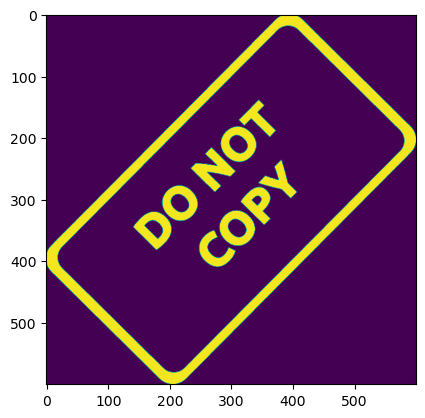

In [58]:
plt.imshow(mask)

In [ ]:
Mask, genellikle bir görüntünün belirli bir kısmını seçmek veya belirli işlemleri uygulamak için kullanılan
ikili (0 ve 1 değerlerine sahip) bir görüntüdür. Bir maskede:

1 (beyaz) olan yerler, işlem uygulanacak bölgeyi temsil eder.
0 (siyah) olan yerler ise işlemin uygulanmayacağı bölgeyi temsil eder.
Maskeyi kullanarak bir görüntünün yalnızca belirli bir bölümünü izole edebilir veya işlemleri sadece bu bölgeye
uygulayabilirsiniz.

Mask Kullanımının Adımları:
Görüntünün Hazırlanması: Görüntü genellikle renkli veya gri tonlamalı bir görüntüdür.
Maskenin Hazırlanması: Mask, genellikle cv2.inRange() gibi işlevlerle oluşturulur ve ikili bir görüntü (siyah-beyaz) elde edilir
    . Beyaz (255) olan kısımlar işlem görecek, siyah (0) olan kısımlar işlem görmeyecektir.
Maske Uygulaması: Maskeyi görüntüye uygulamak için genellikle cv2.bitwise_and() gibi işlevler kullanılır. Bu, maskenin beyaz 
    olan bölgelerine işlem uygulanmasına, siyah olan bölgelerin ise değişmeden kalmasına olanak tanır.

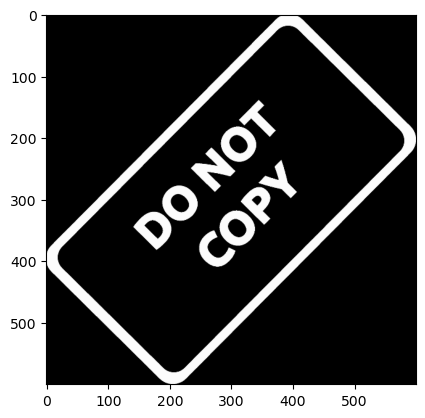

In [59]:
plt.imshow(mask,cmap="gray")

In [60]:
mask.shape #renk kanalları artık içermiyor

(600, 600)

In [67]:
whitebground=np.full(imgs1.shape,255,dtype=np.uint8)#255 beyaz

In [ ]:
Mantığı: Bu fonksiyon, belirli bir boyut ve veri türüne sahip bir NumPy dizisi oluşturur ve tüm elemanlarını verilen bir değerle doldurur.

python
Kodu kopyala
np.full(shape, fill_value, dtype=None)
shape: Oluşturulacak dizinin boyutu.
fill_value: Doldurulacak sabit değer.
dtype: Veri tipi (isteğe bağlı).
Nerelerde Kullanılır?

Sabit bir görüntü veya maske oluşturmak: Örneğin, tüm pikselleri siyah (0), beyaz (255) veya başka bir renk değerine ayarlanmış bir görüntü oluşturmak için kullanılır.
Maskeler ve bölgeler tanımlamak: Belli bir alana sabit bir değer atarken kullanılır.

In [72]:
#bitwise 2 dizinin elemanına bitwise ayrışımını hesaplayacak
bk=cv2.bitwise_or(whitebground,whitebground,mask=mask) #ilk birici kaynağı,ikinci kaynağı ve asıl maskeyi gireceğiz
#kaynak 1 ve 2  için beyaz arka plan uygulanır

In [ ]:
bitwise OR, iki görüntü (veya genel olarak iki matris) arasında her pikselin ikilik değerleri üzerinden mantıksal "OR" işlemini 
uygular. Bu işlem, iki görüntüyü birleştirirken kullanılır ve genellikle maskelerle çalışırken çok faydalıdır.

Mantığı: İki görüntünün her bir pikseli üzerinde mantıksal "OR" işlemi yapılır. Yani, her iki pikseldeki bitlerden en az biri 1
    ise, sonuç pikseli de 1 olur.

Piksel A	Piksel B	OR Sonucu
0	0	0
0	1	1
1	0	1
1	1	1
Nerelerde Kullanılır?

Maskelerle birlikte: Belirli bir bölgeyi izole etmek ve başka bir görüntüyle birleştirmek için kullanılır. 
    Örneğin, iki görüntüyü bir araya getirmek, maskeleme işlemi yapmak veya belirli bir alanı izole etmek istediğinizde kullanabilirsiniz.
Bölge ekleme: Belirli alanları birleştirirken ya da bir şekli bir görüntünün üzerine eklerken kullanılabilir.

In [70]:
bk.shape

(600, 600, 3)

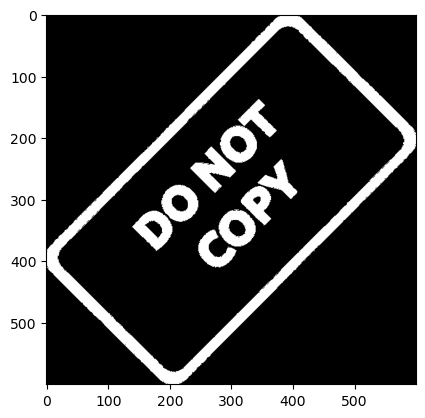

In [73]:
plt.imshow(bk)#bu bitsel ve esasen iki beyaz arka planı yakalamak ve bu maskeyi bunların üstüne koymak
#orjinal maskeyi tersine çevirmek ve diğer iki renk kanalı için numpy kullanrak 2 kere daha biçimlendirmek
#yani yaptığı tüm renk kanalları için beyaz bir arka plan oluşturmak ve bu maskeyi ve bu maskeyi 
#uyguladığınızda artık her bir renk kanalının bu kopyalamayın görüntüsüne sahip olduğunu 
#600 600 3 olur öorjinal ön plan görüntüsünü maskenin üzerine yerleştircez çünkü bu görüntü hala beyaz

In [75]:
#2. görüntü orjinal görüntüdür bu maskeyi üzerine koyacaz yani bunu çalıştırdıktan sonra 
#çıkacak tenk renk beyaz olacak 
fg=cv2.bitwise_or(imgs1,imgs1,mask=mask)

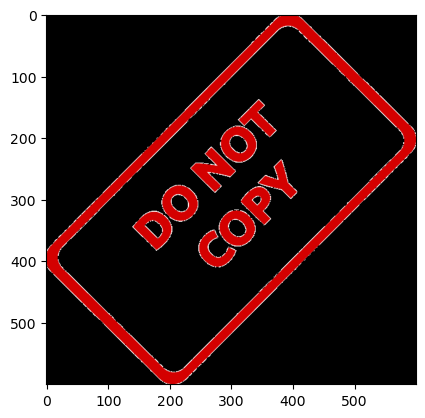

In [76]:
plt.imshow(fg)

In [77]:
finalroi=cv2.bitwise_or(roi,fg)

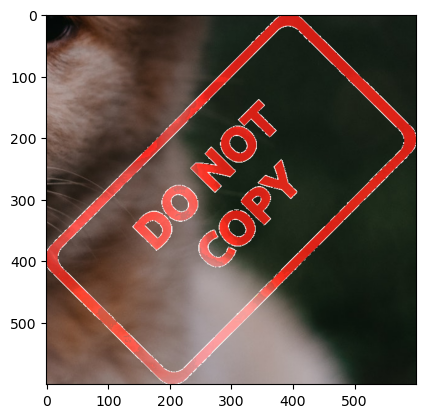

In [79]:
plt.imshow(finalroi)

In [16]:
import cv2
import numpy as np



# Bitwise OR işlemi
result = cv2.bitwise_or(img, imgs1)

# Sonucu gösterelim
cv2.imshow('Bitwise OR Result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:214: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'cv::binary_op'
